In [35]:
from apportionment import *
plt.rcParams.update({'font.size': 15})


In [36]:
names = ["1m-2023.csv"]
sizes = [1000000]

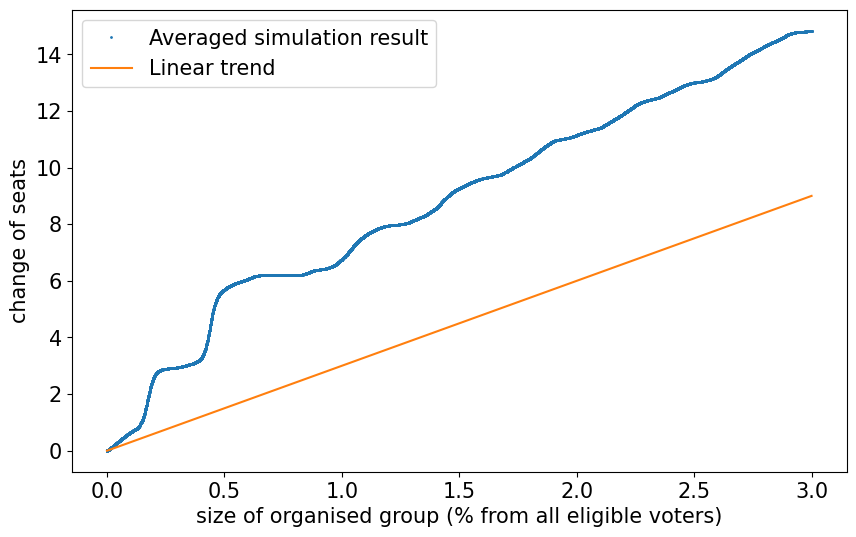

In [37]:
plt.figure(figsize=(10, 6))

x = np.arange(0, 4)
y = 3 * x

for name, size in zip(names, sizes):

    df = pd.read_csv("./vis_data/electable-unweighted-vis-"+name)

    x_values = (df['samples'] / size) * 100
    y_values = df['diff']


    plt.plot(x_values, y_values, 'o', markersize=1, label=f'Averaged simulation result')

plt.plot(x, y, label='Linear trend')
plt.xlabel('size of organised group (% from all eligible voters)')
plt.ylabel('change of seats')
plt.title('')

plt.legend()
plt.show()



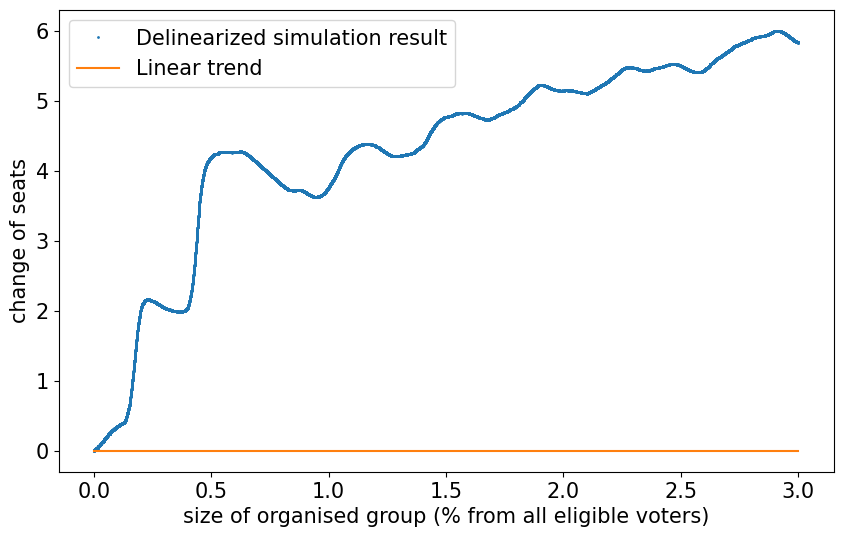

In [38]:
plt.figure(figsize=(10, 6))

x = np.arange(0, 4)
y = 3 * x

for name, size in zip(names, sizes):
    df = pd.read_csv("./vis_data/electable-unweighted-vis-"+name)

    x_values = (df['samples'] / size) * 100
    y_values = df['diff']


    plt.plot(x_values, y_values - (3 * x_values), 'o', markersize=1, label=f'Delinearized simulation result')


plt.plot(x, y * 0, label='Linear trend')
plt.xlabel('size of organised group (% from all eligible voters)')
plt.ylabel('change of seats')
plt.title('')

plt.legend()
plt.show()


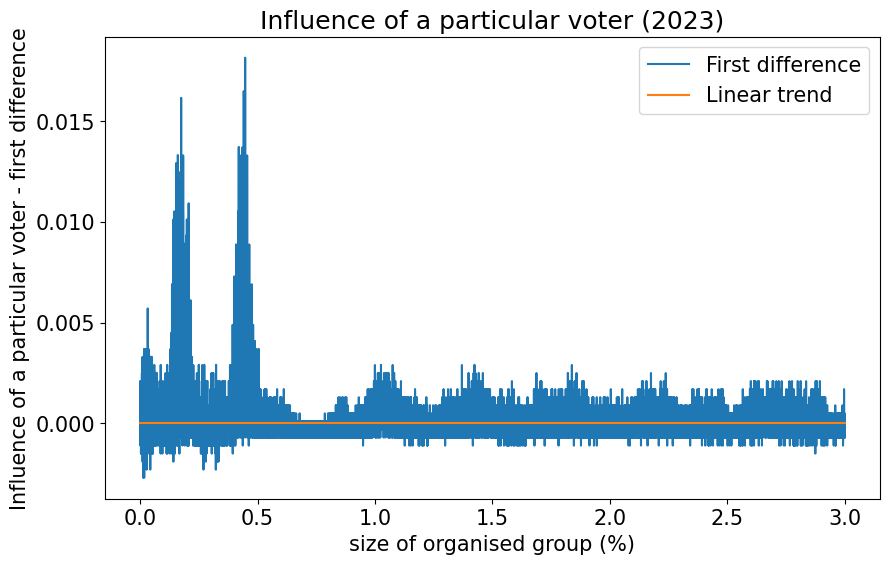

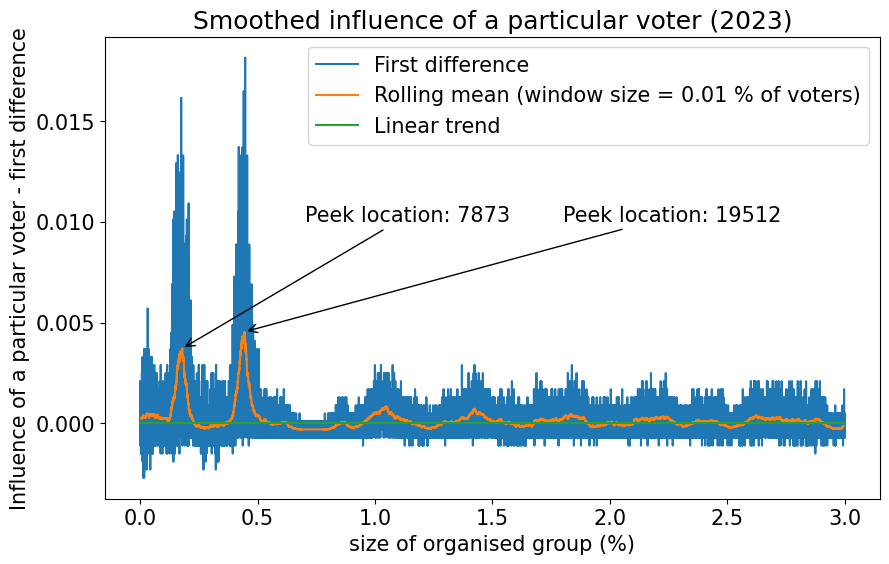

In [39]:
df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023.csv")


x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.title('Influence of a particular voter (2023)')

plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.title('Smoothed influence of a particular voter (2023)')

plt.legend()

# Annotate the maximum indexes on the plot
max_index = y_rolling.idxmax()
plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                xytext=(1.8, 0.01),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

max_index = y_rolling[:3000].idxmax()
plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                xytext=(0.7, 0.01),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()




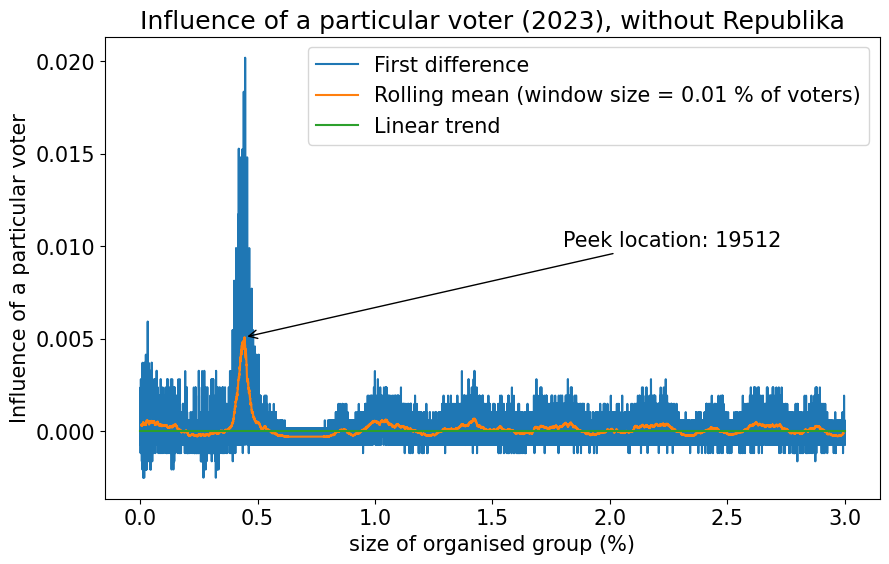

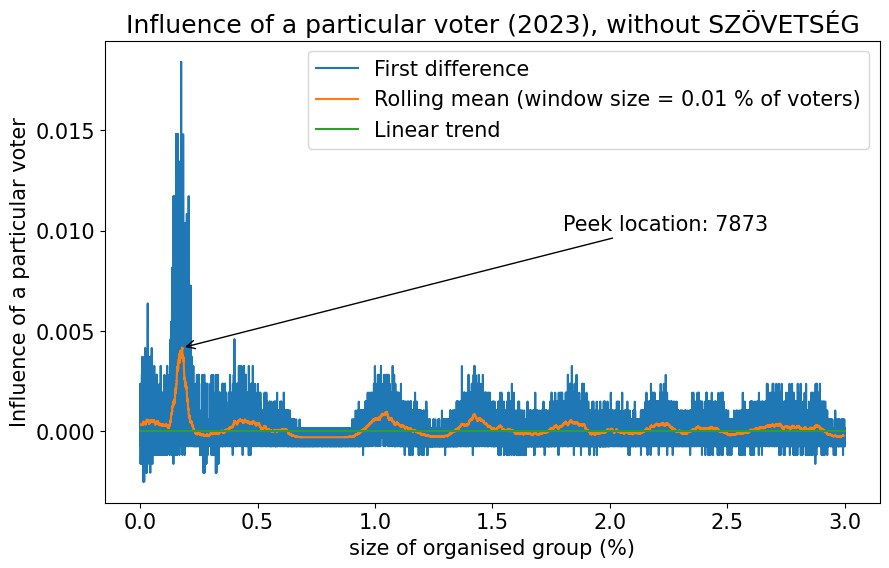

In [55]:
def visualise_and_print(link, text):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2023), without {text}')

    plt.legend()

    # Annotate the maximum indexes on the plot
    max_index = y_rolling.idxmax()
    plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                 xytext=(1.8, 0.01),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.show()

visualise_and_print("./vis_data/electable-unweighted-vis-1m-2023.csv25", "Republika")
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2023.csv18", "SZÖVETSÉG")


In [41]:
# plt.figure(figsize=(10, 6))

# x = np.arange(0, 4)
# y = 3 * x

# for name, size in zip(names, sizes):

#     df = pd.read_csv("./vis_data/electable-unweighted-vis-"+name)

#     x_values = (df['samples'] / size) * 100
#     y_values = df['diff']


#     plt.plot(x_values, y_values, 'o', markersize=1, label=f'Averaged simulation result')

# plt.plot(x, y, label='Linear trend')
# plt.xlabel('size of organised group (% from all eligible voters)')
# plt.ylabel('change of seats')
# plt.title('')

# plt.legend()
# plt.show()



In [42]:
# def visualise_and_print(link):
#     df = pd.read_csv(link)

#     plt.figure(figsize=(10, 6))

#     x_values = (df['samples'] / 1000000) * 100
#     y_values = df['diff']
#     y_vals =  y_values - (3 * x_values)

#     y_deriv = y_vals.diff()
#     y_rolling = y_deriv.rolling(window=100, center=True).mean()

#     x = np.arange(0, 4)
#     y = 3 * x

#     plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
#     plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

#     plt.plot(x, y * 0, label='Linear trend')

#     plt.xlabel('size of organised group (%)')
#     plt.ylabel('change of seats - first difference')
#     plt.title('Difference of seat distribution function (2016)')

#     plt.legend()

#     # Annotate the maximum indexes on the plot
#     max_index = y_rolling.idxmax()
#     plt.annotate(f'Peek location: {int(max_index * (4426760 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
#                  xytext=(1.8, 0.02),
#                  arrowprops=dict(facecolor='black', arrowstyle='->'))
    
#     max_index = y_rolling[:27000].idxmax()
#     plt.annotate(f'Peek location: {int(max_index * (4426760 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
#                  xytext=(1.8, 0.01),
#                  arrowprops=dict(facecolor='black', arrowstyle='->'))

#     max_index = y_rolling[:3000].idxmax()
#     plt.annotate(f'Peek location: {int(max_index * (4426760 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
#                  xytext=(0.7, 0.01),
#                  arrowprops=dict(facecolor='black', arrowstyle='->'))

#     plt.show()

# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2016.csv")

# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2016.csv17")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2016.csv21")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2016.csv17_21")

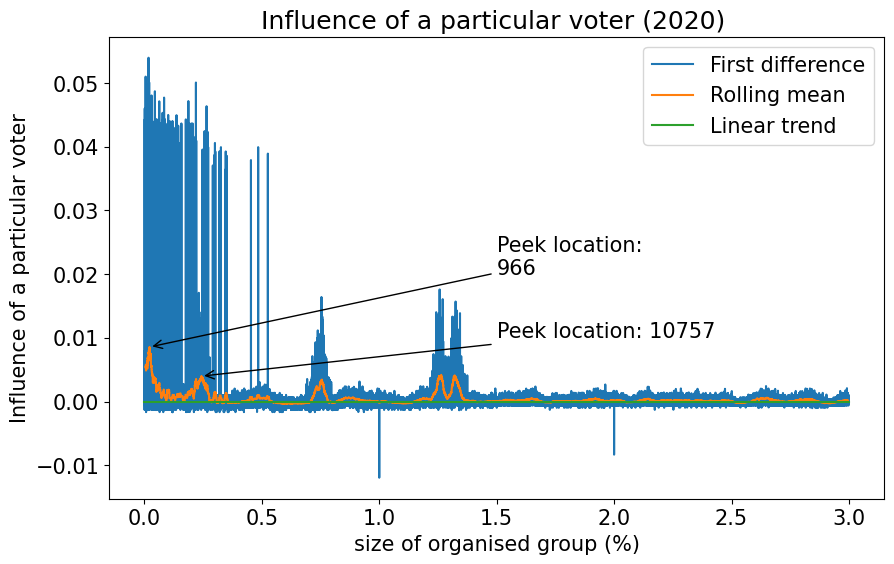

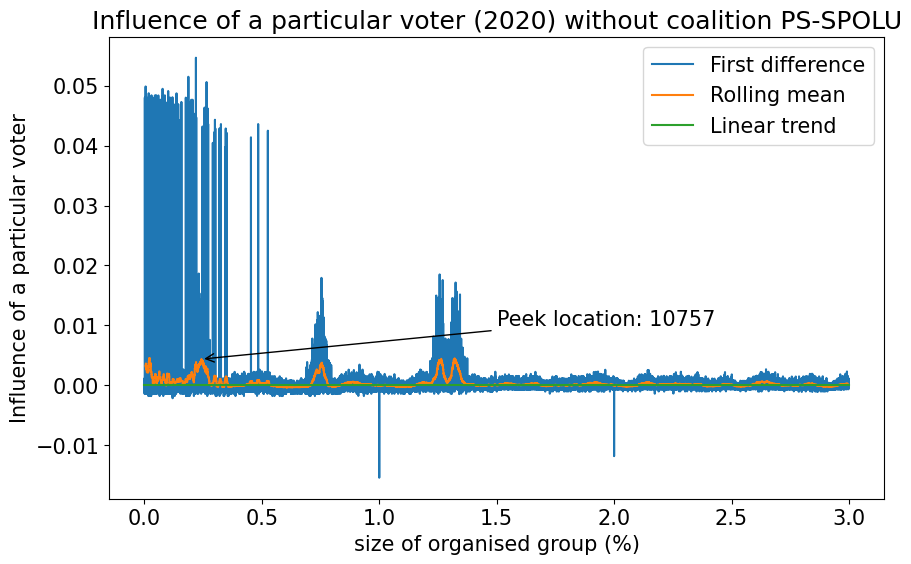

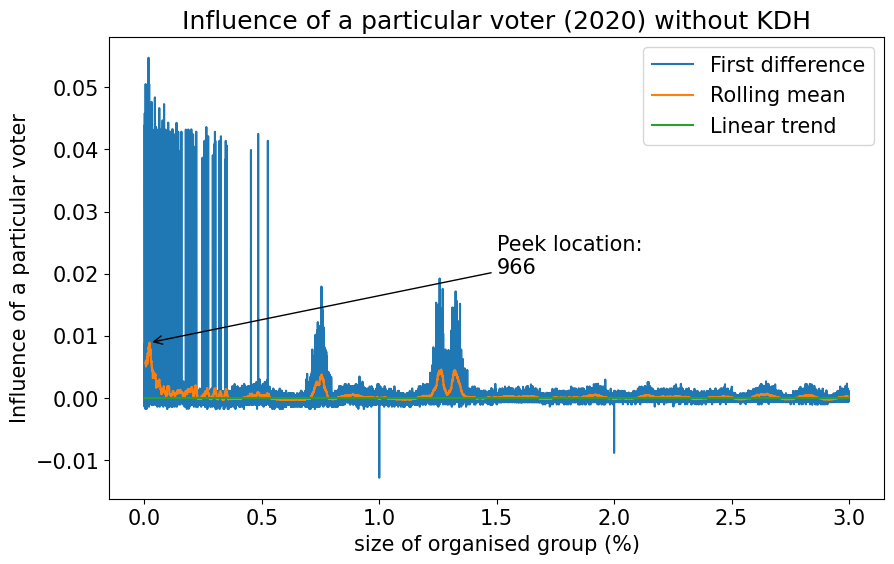

In [83]:
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, year=2020)
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[12], year=2020)
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[15], year=2020)
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[12, 15])

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[22])
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[2])
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[9])
# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[2, 9])

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[2, 9, 22])

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[0])

# for i in [3, 4, 6, 11, 18, 19, 24]:
#     raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[i])

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], year=2020)

def visualise_and_print(link, text="", peek=True, ppk=True):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2020) {text}')

    plt.legend()

    # Annotate the maximum indexes on the plot
    # max_index = y_rolling.idxmax()
    # plt.annotate(f'Peek location: {int(max_index * (4432419 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #              xytext=(2.3, 0.02),
    #              arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    if ppk:
        max_index = y_rolling[:18000].idxmax()
        plt.annotate(f'Peek location: \n{int(max_index * (4432419 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                    xytext=(1.5, 0.02),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

    if peek:
        max_index = y_rolling[1500:3000].idxmax()
        plt.annotate(f'Peek location: {int(max_index * (4432419 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                    xytext=(1.5, 0.01),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.show()


visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv", text="")

visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv12", text="without coalition PS-SPOLU", ppk=False)
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv15", text="without KDH", peek=False)
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv18")

# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv12_15")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv18")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv2")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv9")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv2_9")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv2_9_22")
# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv0")

# for i in [3, 4, 6, 11, 18, 19, 24]:
#     visualise_and_print(f"./vis_data/electable-unweighted-vis-1m-2020.csv{i}")

# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv0_1_2_3_4_5_6_7_8_9_10_12_13_14_15_16_17_18_19_20_21_22_23_24_25")


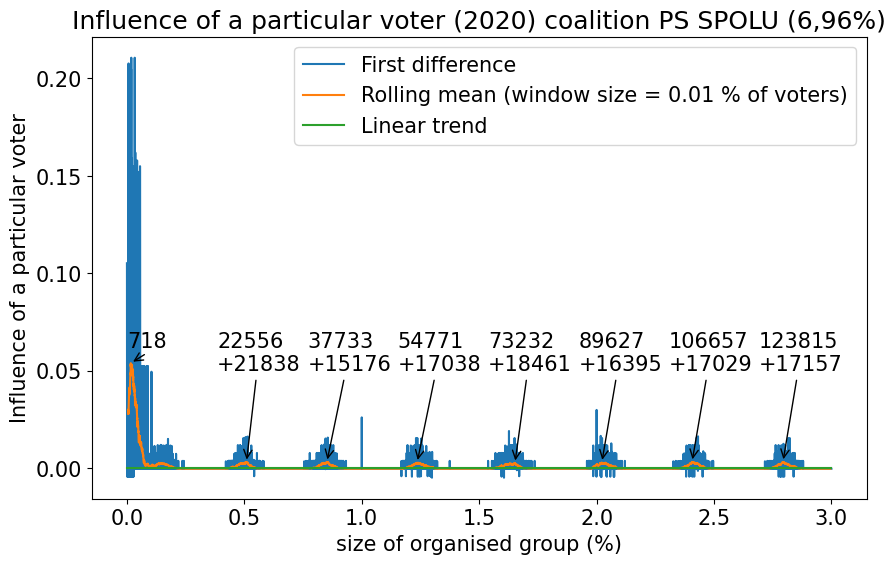

In [90]:
# PS SPOLU koalicia 2020 analysis

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], year=2020)


def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2020) coalition PS SPOLU (6,96%)')

    plt.legend()

    indent = 3800
    prev_max = None
    for i in range(1, 9):
        # Annotate the maximum indexes on the plot
        max_index = y_rolling[((i-1) * indent):(i * indent)].idxmax() 
        plt.annotate(f'{int(max_index * (4432419 / 1000000))}\n{"+" + str(int((max_index - prev_max) * (4432419 / 1000000))) if prev_max is not None else ""}', xy=(x_values[max_index], y_rolling[max_index]),
                    xytext=((i-1)/(2.6), 0.05),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
        prev_max = max_index

        

visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv0_1_2_3_4_5_6_7_8_9_10_11_13_14_15_16_17_18_19_20_21_22_23_24_25")

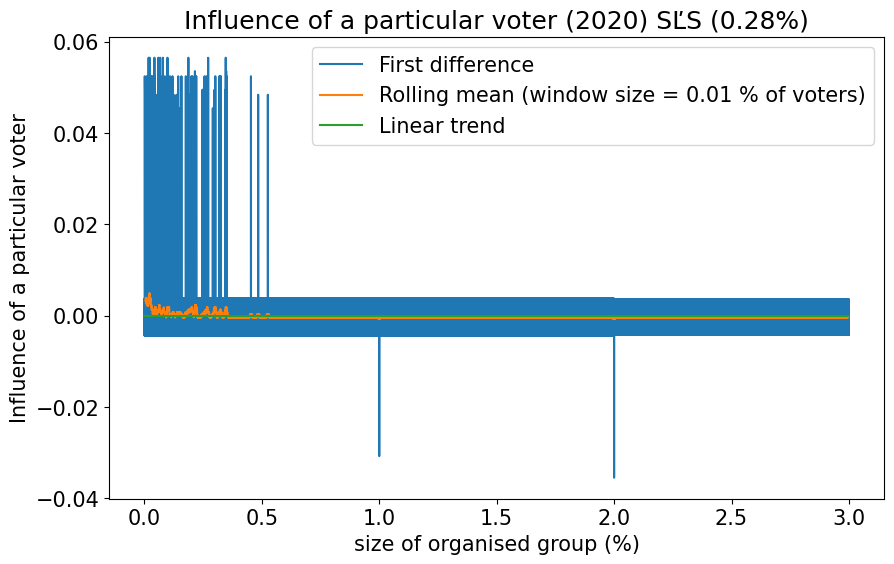

In [93]:
# SLS 2020 analysis

def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2020) SĽS (0.28%)')

    plt.legend()

    # indent = 3800
    # prev_max = None
    # for i in range(1, 9):
    #     # Annotate the maximum indexes on the plot
    #     max_index = y_rolling[((i-1) * indent):(i * indent)].idxmax() 
    #     plt.annotate(f'{int(max_index * (4432419 / 1000000))}\n{"+" + str(int((max_index - prev_max) * (4432419 / 1000000))) if prev_max is not None else ""}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=((i-1)/(2.6), 0.05),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    #     prev_max = max_index

        

visualise_and_print("./vis_data/unweighted-vis-1m-2020.csv0_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25")

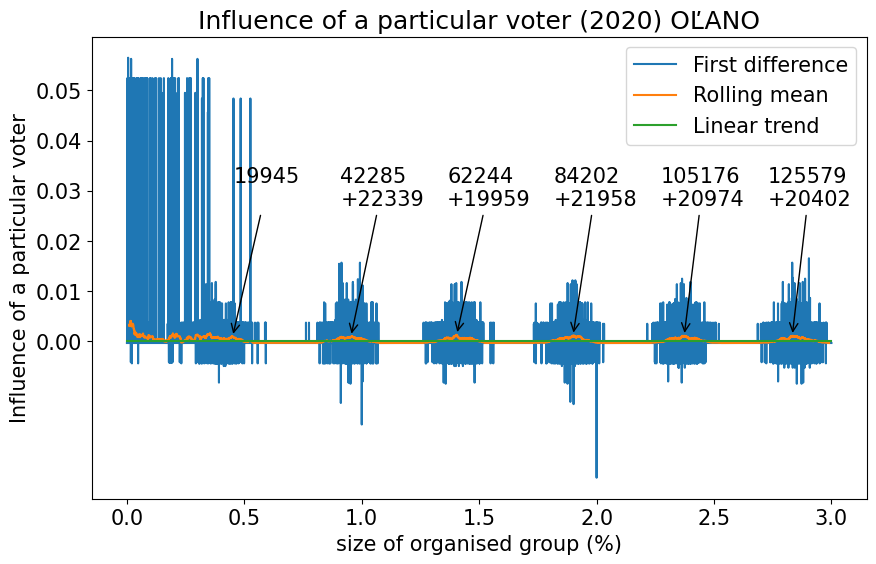

In [101]:
# olano 2020

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])


def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean")

    plt.plot(x, y * 0, label='Linear trend')
    plt.yticks([0.00, 0.01, 0.02, 0.03, 0.04, 0.05])

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2020) OĽANO')

    plt.legend()

    indent = 4500
    prev_max = None
    for i in range(2, 8):
        # Annotate the maximum indexes on the plot
        max_index = y_rolling[((i-1) * indent):(i * indent)].idxmax() 
        plt.annotate(f'{int(max_index * (4432419 / 1000000))}\n{"+" + str(int((max_index - prev_max) * (4432419 / 1000000))) if prev_max is not None else ""}', xy=(x_values[max_index], y_rolling[max_index]),
                    xytext=((i-1)/(2.2), 0.027),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
        prev_max = max_index

        


visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv0_1_2_3_4_5_6_7_8_9_10_12_13_14_15_16_17_18_19_20_21_22_23_24_25")


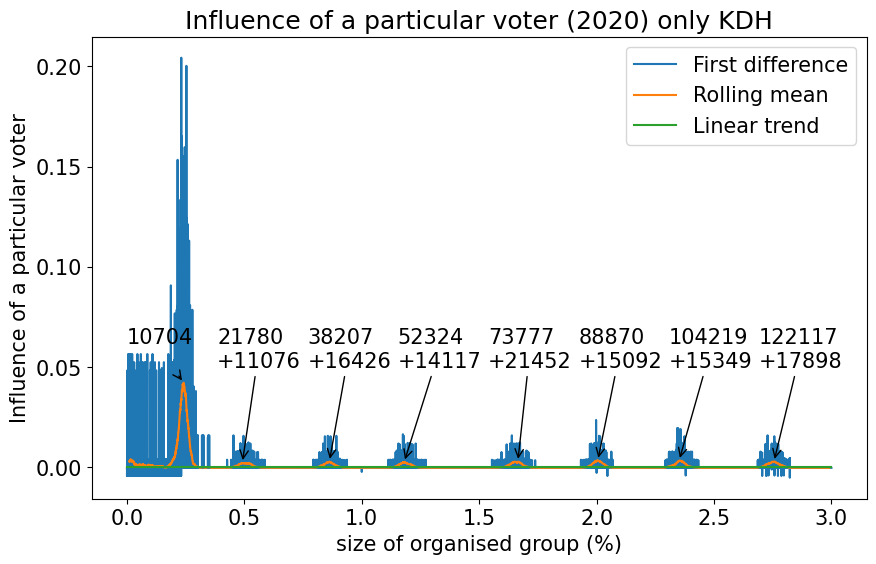

In [97]:
# kdh  2020 analysis

# raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])


def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2020) only KDH')

    plt.legend()

    indent = 3800
    prev_max = None
    for i in range(1, 9):
        # Annotate the maximum indexes on the plot
        max_index = y_rolling[((i-1) * indent):(i * indent)].idxmax() 
        plt.annotate(f'{int(max_index * (4432419 / 1000000))}\n{"+" + str(int((max_index - prev_max) * (4432419 / 1000000))) if prev_max is not None else ""}', xy=(x_values[max_index], y_rolling[max_index]),
                    xytext=((i-1)/(2.6), 0.05),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
        prev_max = max_index

        


visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_16_17_18_19_20_21_22_23_24_25")

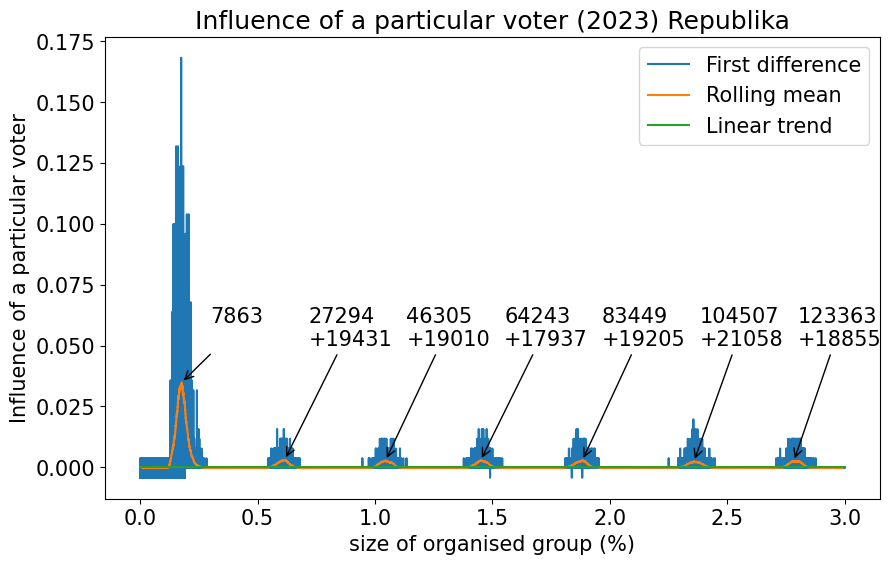

In [62]:
# republika 2023 analysis

# raw2visualisable("1m-2023.csv", 1000000, weighted=False, only_electable=True, neglected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])


def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('Influence of a particular voter')
    plt.title(f'Influence of a particular voter (2023) Republika')

    plt.legend()

    indent = 4000
    prev_max = None
    for i in range(1, 8):
        # Annotate the maximum indexes on the plot
        max_index = y_rolling[((i-1) * indent):(i * indent)].idxmax() 
        plt.annotate(f'{int(max_index * (4432419 / 1000000))}\n{"+" + str(int((max_index - prev_max) * (4432419 / 1000000))) if prev_max is not None else ""}', xy=(x_values[max_index], y_rolling[max_index]),
                    xytext=((i-1)/(2.4) + 0.3, 0.05),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
        prev_max = max_index

        


visualise_and_print("./vis_data/electable-unweighted-vis-1m-2023.csv0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24")

In [79]:
# # kdh and PS 2020 analysis

# # raw2visualisable("1m-2020.csv", 1000000, weighted=False, only_electable=True, neglected=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])


# def visualise_and_print(link):
#     df = pd.read_csv(link)

#     plt.figure(figsize=(10, 6))

#     x_values = (df['samples'] / 1000000) * 100
#     y_values = df['diff']
#     y_vals =  y_values - (3 * x_values)

#     y_deriv = y_vals.diff()
#     y_rolling = y_deriv.rolling(window=200, center=True).mean()

#     x = np.arange(0, 4)
#     y = 3 * x

#     plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
#     plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

#     plt.plot(x, y * 0, label='Linear trend')

#     plt.xlabel('size of organised group (%)')
#     plt.ylabel('change of seats - first difference')
#     plt.title(f'Difference of seat distribution function (2020) considering only subject 12 and 15')

#     plt.legend()

#     indent = 4000
#     prev_max = None
#     for i in range(1, 9):
#         # Annotate the maximum indexes on the plot
#         max_index = y_rolling[((i-1) * indent):(i * indent)].idxmax() 
#         plt.annotate(f'{int(max_index * (4432419 / 1000000))}\n{"+" + str(int((max_index - prev_max) * (4432419 / 1000000))) if prev_max is not None else ""}', xy=(x_values[max_index], y_rolling[max_index]),
#                     xytext=((i-1)/(2.6), 0.02),
#                     arrowprops=dict(facecolor='black', arrowstyle='->'))
#         prev_max = max_index

        


# visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv0_1_2_3_4_5_6_7_8_9_10_11_13_14_16_17_18_19_20_21_22_23_24_25")

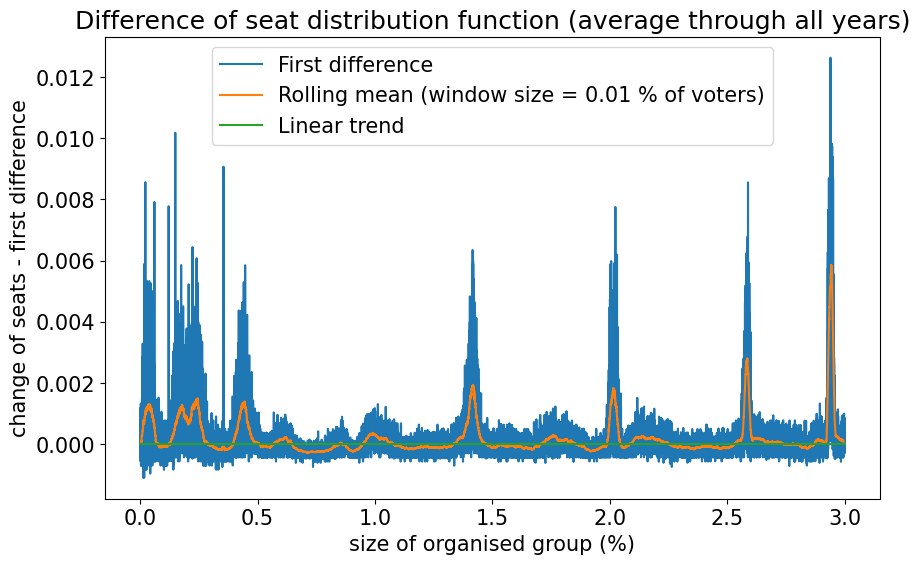

In [49]:
# PRIEMER VSETKYCH VOLIEB

df2023 = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023.csv")
df2020 = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2020.csv")
df2016 = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2016.csv")

plt.figure(figsize=(10, 6))

y_values23 = df2023['diff']
y_values20 = df2020['diff']
y_values16 = df2016['diff']

y_values = (y_values23 + y_values20 + y_values16) / 3 
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats - first difference')
plt.title(f'Difference of seat distribution function (average through all years)')

plt.legend()
